In [12]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [13]:
path = '../../Dataset/bus/A_2017.11.30_16.48.26.csv.gz'
coordinate_path = '../../Dataset/lagos_coordinates.csv'

In [14]:
node_data = pd.read_csv(path, compression='gzip')
coord_data = pd.read_csv(coordinate_path)

In [15]:
# drop longitude and latitude columns in bus_data
node_data = node_data.drop(['Longitude', 'Latitude'], axis=1)

In [16]:
# Concatenate the DataFrames column-wise
node_data = pd.concat([node_data, coord_data], axis=1)

In [17]:
node_data.head() 

,Timestamp,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,Latitude,Longitude
0,2017.11.30_16.48.26,0,A,2,LTE,-102,-12,10.0,7,-85,3,7,D,-,-,-8.491719,51.893905,665.24000000000001,6.454094,3.389280
1,2017.11.30_16.48.26,1,A,2,LTE,-102,-12,10.0,7,-85,3,7,D,-,-,-8.491719,51.893905,658.67999999999995,6.454094,3.389304
2,2017.11.30_16.48.27,1,A,2,LTE,-102,-12,7.0,10,-87,310,14,D,-,-,-8.491719,51.893905,658.67999999999995,6.454094,3.389328
3,2017.11.30_16.48.28,1,A,2,LTE,-102,-12,7.0,7,-85,0,0,I,-,-,-8.491719,51.893905,658.67999999999995,6.454094,3.389352
4,2017.11.30_16.48.29,1,A,2,LTE,-102,-13,8.0,7,-85,0,0,I,-,-,-8.491719,51.893905,658.67999999999995,6.454094,3.389376


In [18]:
node_data.tail()

,Timestamp,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,Latitude,Longitude
905,2017.11.30_17.04.24,46,A,1,LTE,-91,-12,3.0,12,-72,7068,128,D,-89.0,-10.0,-8.535593,51.880268,1968.8299999999999,6.454094,3.410881
906,2017.11.30_17.04.25,46,A,1,LTE,-91,-12,3.0,10,-69,8992,166,D,-89.0,-10.0,-8.535593,51.880268,1968.8299999999999,6.454094,3.410905
907,2017.11.30_17.04.26,46,A,1,LTE,-86,-11,5.0,9,-76,9584,177,D,-85.0,-9.0,-8.535593,51.880268,1968.8299999999999,6.454094,3.410928
908,2017.11.30_17.04.27,46,A,1,LTE,-86,-11,5.0,10,-74,11060,198,D,-85.0,-9.0,-8.535593,51.880268,1968.8299999999999,6.454094,3.410952
909,2017.11.30_17.04.27,46,A,1,LTE,-86,-11,5.0,5,-76,11060,198,D,-85.0,-9.0,-8.535593,51.880268,1968.8299999999999,6.454094,3.410976


In [5]:
node_data['Timestamp'] = pd.to_datetime(node_data['Timestamp'], format='%Y.%m.%d_%H.%M.%S')

In [6]:
node_data['Hour'] = node_data['Timestamp'].dt.hour
node_data['Minute'] = node_data['Timestamp'].dt.minute
node_data['Seconds'] = node_data['Timestamp'].dt.second
node_data['DayOfWeek'] = node_data['Timestamp'].dt.dayofweek

In [7]:
node_data.head()

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,Hour,Minute,Seconds,DayOfWeek
0,2017-11-30 16:48:26,-8.501373,51.893359,0,A,2,LTE,-102,-12,10.0,...,D,-,-,-8.491719,51.893905,665.24000000000001,16,48,26,3
1,2017-11-30 16:48:26,-8.501291,51.893462,1,A,2,LTE,-102,-12,10.0,...,D,-,-,-8.491719,51.893905,658.67999999999995,16,48,26,3
2,2017-11-30 16:48:27,-8.501291,51.893462,1,A,2,LTE,-102,-12,7.0,...,D,-,-,-8.491719,51.893905,658.67999999999995,16,48,27,3
3,2017-11-30 16:48:28,-8.501291,51.893462,1,A,2,LTE,-102,-12,7.0,...,I,-,-,-8.491719,51.893905,658.67999999999995,16,48,28,3
4,2017-11-30 16:48:29,-8.501291,51.893462,1,A,2,LTE,-102,-13,8.0,...,I,-,-,-8.491719,51.893905,658.67999999999995,16,48,29,3


In [8]:
node_data[['RSSI']].tail()

,RSSI
905,-72
906,-69
907,-76
908,-74
909,-76


In [9]:
node_data.isnull().sum()

Timestamp               0
Longitude               0
Latitude                0
Speed                   0
Operatorname            0
CellID                  0
NetworkMode             0
RSRP                    0
RSRQ                    0
SNR                     0
CQI                     0
RSSI                    0
DL_bitrate              0
UL_bitrate              0
State                   0
NRxRSRP                 0
NRxRSRQ                 0
ServingCell_Lon         0
ServingCell_Lat         0
ServingCell_Distance    0
Hour                    0
Minute                  0
Seconds                 0
DayOfWeek               0
dtype: int64

In [10]:
node_data.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'CellID',
       'NetworkMode', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'State', 'NRxRSRP', 'NRxRSRQ', 'ServingCell_Lon',
       'ServingCell_Lat', 'ServingCell_Distance', 'Hour', 'Minute', 'Seconds',
       'DayOfWeek'],
      dtype='object')

In [11]:
node_data.CellID.unique()

array([2, 6, 1, 8, 0, 7])

In [12]:
node_data[['RSSI']].tail()

,RSSI
905,-72
906,-69
907,-76
908,-74
909,-76


In [13]:
# Convert RSSI to numeric, coercing errors, and fill NaN values with the median
node_data['RSSI'] = pd.to_numeric(node_data['RSSI'], errors='coerce')
node_data['RSSI'].fillna(node_data['RSSI'].median(), inplace=True)

/tmp/ipykernel_969/2315469921.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  node_data['RSSI'].fillna(node_data['RSSI'].median(), inplace=True)


In [14]:
node_data[['RSSI']].tail()

,RSSI
905,-72.0
906,-69.0
907,-76.0
908,-74.0
909,-76.0


In [15]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             910 non-null    datetime64[ns]
 1   Longitude             910 non-null    float64       
 2   Latitude              910 non-null    float64       
 3   Speed                 910 non-null    int64         
 4   Operatorname          910 non-null    object        
 5   CellID                910 non-null    int64         
 6   NetworkMode           910 non-null    object        
 7   RSRP                  910 non-null    int64         
 8   RSRQ                  910 non-null    int64         
 9   SNR                   910 non-null    float64       
 10  CQI                   910 non-null    int64         
 11  RSSI                  910 non-null    float64       
 12  DL_bitrate            910 non-null    int64         
 13  UL_bitrate          

In [16]:
# Normalize the relevant columns
scaler = MinMaxScaler()
node_data[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate']] = scaler.fit_transform(
    node_data[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate']]
)

In [17]:
relevant_features = node_data[['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'CellID', 'Hour']]

In [18]:
relevant_features.head()

,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,CellID,Hour
0,0.4,0.555556,0.511111,0.428571,0.187500,0.000053,0.006019,2,16
1,0.4,0.555556,0.511111,0.428571,0.187500,0.000053,0.006019,2,16
2,0.4,0.555556,0.444444,0.642857,0.145833,0.005473,0.012038,2,16
3,0.4,0.555556,0.444444,0.428571,0.187500,0.000000,0.000000,2,16
4,0.4,0.500000,0.466667,0.428571,0.187500,0.000000,0.000000,2,16


# aggregate data


In [19]:
# Aggregate data by CellID and Hour
aggregated_data = node_data.groupby(['CellID', 'Hour', 'Seconds']).agg({
    'DL_bitrate': 'sum',  # Sum of DL_bitrate for each cell and hour
    'UL_bitrate': 'sum',
    'RSRP': 'mean',       # Mean RSRP for each cell and hour
    'RSRQ': 'mean',       # Mean RSRQ for each cell and hour
    'SNR': 'mean',        # Mean SNR for each cell and hour
    'CQI': 'mean',        # Mean CQI for each cell and hour
    'RSSI': 'mean',       # Mean RSSI for each cell and hour
    'Timestamp': 'count'  # Number of records (indicating number of users)
}).rename(columns={'Timestamp': 'User_Count'}).reset_index()

In [20]:
aggregated_data.head()

,CellID,Hour,Seconds,DL_bitrate,UL_bitrate,RSRP,RSRQ,SNR,CQI,RSSI,User_Count
0,0,16,19,0.480758,0.435942,0.384615,0.500000,0.288889,0.357143,0.166667,1
1,0,16,20,0.544910,0.561479,0.384615,0.500000,0.288889,0.642857,0.312500,1
2,0,16,21,0.391113,0.343938,0.415385,0.555556,0.400000,0.500000,0.208333,1
3,0,16,22,0.641069,0.554600,0.415385,0.555556,0.400000,0.571429,0.270833,1
4,0,16,23,0.585990,0.602752,0.476923,0.722222,0.466667,0.571429,0.270833,1


In [21]:
aggregated_data.User_Count.unique()

array([1, 2, 3, 6, 5, 4, 7])

In [22]:
node_data.shape

(910, 24)

In [23]:
aggregated_data.shape

(364, 11)

In [24]:
# Define peak and off-peak based on DL_bitrate threshold
threshold = aggregated_data['DL_bitrate'].median()
aggregated_data['Peak'] = (aggregated_data['DL_bitrate'] > threshold).astype(int)
aggregated_data['Off-peak'] = (aggregated_data['DL_bitrate'] < threshold).astype(int)

In [25]:
aggregated_data.tail()

,CellID,Hour,Seconds,DL_bitrate,UL_bitrate,RSRP,RSRQ,SNR,CQI,RSSI,User_Count,Peak,Off-peak
359,8,17,43,0.391908,0.349097,0.276923,0.166667,0.177778,0.071429,0.041667,1,0,1
360,8,17,56,0.240476,0.386071,0.246154,0.388889,0.377778,0.357143,0.020833,1,0,1
361,8,17,57,0.240476,0.386071,0.246154,0.388889,0.377778,0.357143,0.020833,1,0,1
362,8,17,58,0.221904,0.200344,0.246154,0.388889,0.377778,0.357143,0.000000,1,0,1
363,8,17,59,0.345903,0.722270,0.246154,0.388889,0.355556,0.357143,0.000000,1,0,1


# prepare sequences

In [26]:
# Prepare the data for LSTM
def create_sequences(node_data, seq_length):
    sequences = []
    for i in range(len(node_data) - seq_length):
        seq = node_data.iloc[i:i + seq_length].drop(columns=['Peak']).values
        target = node_data.iloc[i + seq_length]['Peak']
        sequences.append((seq, target))
    return sequences

In [27]:
# Define the sequence length
seq_length = 5

In [28]:
# Create sequences
sequences = create_sequences(aggregated_data, seq_length)

In [29]:
print(sequences)

[(array([[ 0.        , 16.        , 19.        ,  0.48075769,  0.43594153,
         0.38461538,  0.5       ,  0.28888889,  0.35714286,  0.16666667,
         1.        ,  1.        ],
       [ 0.        , 16.        , 20.        ,  0.5449105 ,  0.56147893,
         0.38461538,  0.5       ,  0.28888889,  0.64285714,  0.3125    ,
         1.        ,  0.        ],
       [ 0.        , 16.        , 21.        ,  0.39111323,  0.34393809,
         0.41538462,  0.55555556,  0.4       ,  0.5       ,  0.20833333,
         1.        ,  1.        ],
       [ 0.        , 16.        , 22.        ,  0.6410691 ,  0.55460017,
         0.41538462,  0.55555556,  0.4       ,  0.57142857,  0.27083333,
         1.        ,  0.        ],
       [ 0.        , 16.        , 23.        ,  0.58599018,  0.6027515 ,
         0.47692308,  0.72222222,  0.46666667,  0.57142857,  0.27083333,
         1.        ,  0.        ]]), 1.0), (array([[ 0.        , 16.        , 20.        ,  0.5449105 ,  0.56147893,
         0.

In [30]:
# Split the sequences into train and test sets
X = np.array([seq for seq, _ in sequences])
y = np.array([target for _, target in sequences])

In [31]:
y

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize/train LSTM model

In [33]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/home/lordmax/.virtualenvs/generalenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,555 (384.98 KB)

 Trainable params: 32,851 (128.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,704 (256.66 KB)

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.5013 - loss: 0.6957 - val_accuracy: 0.5345 - val_loss: 0.6931
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5640 - loss: 0.6825 - val_accuracy: 0.5690 - val_loss: 0.6750
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5361 - loss: 0.6738 - val_accuracy: 0.6552 - val_loss: 0.6689
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6406 - loss: 0.6572 - val_accuracy: 0.6207 - val_loss: 0.6520
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6640 - loss: 0.6277 - val_accuracy: 0.7069 - val_loss: 0.6138
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7185 - loss: 0.5790 - val_accuracy: 0.7931 - val_loss: 0.5644
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7902 - loss: 0.5396 - val_accuracy: 0.7586 - val_loss: 0.5211
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7519 - loss: 0.5066 - val_accuracy: 0.7931 - val_loss: 0.4831
Epoch 9/20

# evaluate model

In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
predictions = (model.predict(X_test) > 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8711 - loss: 0.3561 
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


In [44]:
# Save predictions to a .npy file
np.save('../../models/eNodeBpredictions.npy', predictions)

In [37]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.33750808238983154
Test Accuracy: 0.875


In [38]:
print(f"Sample Predictions: {predictions[:10].flatten()}")

Sample Predictions: [1 1 0 0 0 0 0 1 1 1]


In [39]:
print(f"actual: {y_test[:10].flatten()}")

actual: [1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


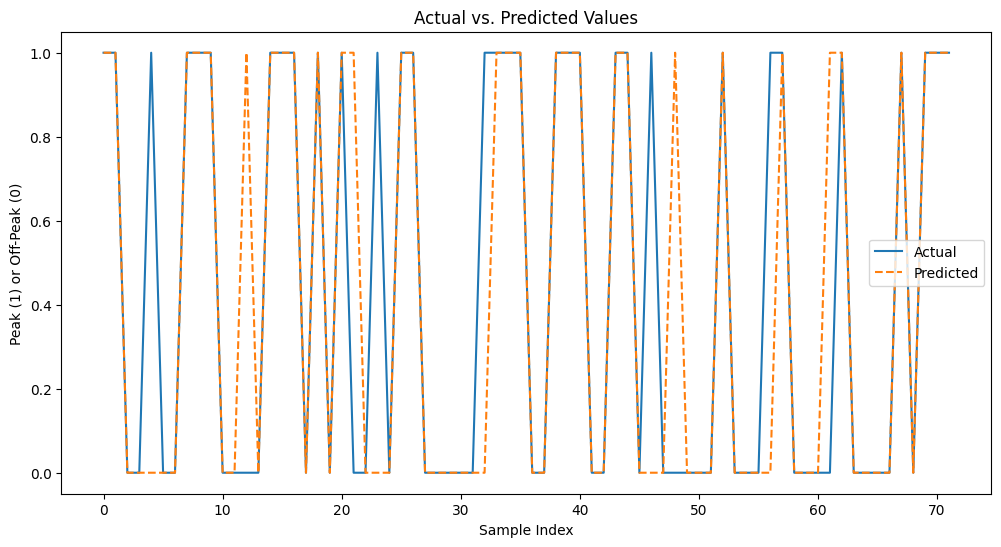

In [40]:
# Plotting Predicted vs. Actual Values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Peak (1) or Off-Peak (0)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

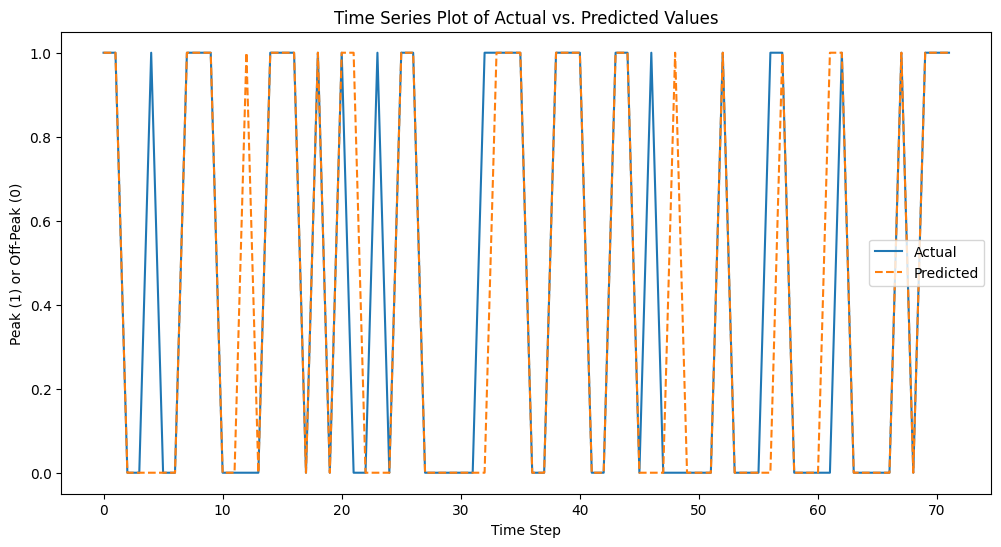

In [41]:
# Time Series Plot of Predictions
plt.figure(figsize=(12, 6))
time_series_index = np.arange(len(y_test))  # Create a time series index
plt.plot(time_series_index, y_test, label='Actual')
plt.plot(time_series_index, predictions, label='Predicted', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Peak (1) or Off-Peak (0)')
plt.title('Time Series Plot of Actual vs. Predicted Values')
plt.legend()
plt.show()